In [1]:
import nltk
# nltk.download('punkt')
# nltk.download('stopwords')
import string
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from keras.utils import np_utils
from keras.models import Sequential
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
from keras.layers.core import Dense, Dropout, Activation
import matplotlib.pyplot as plt
#plt.style.use('ggplot')

Using TensorFlow backend.
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:

In [2]:
data = pd.read_csv('./Combined_News.csv')
train = data[:1600]  # read train dataset
test = data[1601:1967]    # read test dataset
#print test
#print data.shape
print (train.shape)
print (test.shape)


(1600, 27)
(366, 27)


In [3]:
from collections import Counter
import string

In [4]:
def get_tokens():
   with open('./Combined_News.csv', 'r') as shakes:
    text = shakes.read()
    lowers = text.lower()
    no_punctuation = lowers.translate( string.punctuation)
    tokens = nltk.word_tokenize(no_punctuation)
    return tokens

tokens = get_tokens()
count = Counter(tokens)

In [5]:
from nltk.corpus import stopwords              #remove english stop words

tokens = get_tokens()
filtered = [w for w in tokens if not w in stopwords.words('english')]
count = Counter(filtered)

In [6]:
token_dict = {}
stemmer = PorterStemmer()

def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems


In [7]:
batch_size = 100   # batch_size
nb_classes = 2    # label 0 or 1


In [8]:
trainheadlines = []
for row in range(0,len(train.index)):
    trainheadlines.append(' '.join(str(x) for x in train.iloc[row,2:3]))

In [9]:

advancedvectorizer = TfidfVectorizer(tokenizer=tokenize,max_features = 1000,stop_words='english')  #TfidfVectorizer
advancedtrain = advancedvectorizer.fit_transform(trainheadlines)
print (advancedtrain)
testheadlines = []
for row in range(0,len(test.index)):
    testheadlines.append(' '.join(str(x) for x in test.iloc[row,2:3]))
advancedtest = advancedvectorizer.transform(testheadlines)

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] 

  (0, 962)	0.3702594693417071
  (0, 258)	0.3634738476227328
  (0, 4)	0.17527898310020373
  (0, 793)	0.4106596602319296
  (0, 411)	0.5234767339895599
  (0, 5)	0.4232966868405944
  (0, 121)	0.27968309366151883
  (1, 497)	0.24295775307492498
  (1, 299)	0.25905705728074424
  (1, 978)	0.25302982563068993
  (1, 11)	0.08981498472929726
  (1, 43)	0.3795131604719184
  (1, 449)	0.7041848117519244
  (1, 617)	0.29730170058727406
  (1, 85)	0.25302982563068993
  (1, 4)	0.09721761799665786
  (2, 14)	0.21947186615641576
  (2, 958)	0.43894906868000405
  (2, 651)	0.6338182730907991
  (2, 11)	0.2320939576021805
  (2, 43)	0.4903564346279221
  (2, 4)	0.25122335407068364
  (3, 769)	0.31069635930864836
  (3, 41)	0.19023544761033287
  (3, 495)	0.34623404526717066
  :	:
  (1596, 41)	0.20503796272188937
  (1597, 585)	0.23669237282682118
  (1597, 999)	0.19926740675926807
  (1597, 539)	0.1564275477404042
  (1597, 839)	0.22635442886216148
  (1597, 967)	0.19926740675926807
  (1597, 912)	0.3239339998879331
  (1597, 

In [10]:
X_train = advancedtrain.toarray()
X_test = advancedtest.toarray()
print (X_train)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
y_train = np.array(train["Label"])
y_test = np.array(test["Label"])
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
X_train = np.reshape(X_train,(-1,10,100))
X_test = np.reshape(X_test,(-1,10,100))
#input_dim = X_train.shape[1]
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.19926741]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]
X_train shape: (1600, 1000)
X_test shape: (366, 1000)
X_train shape: (1600, 10, 100)
X_test shape: (366, 10, 100)


In [11]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import time
from datetime import date
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer

import datetime
import logging

In [12]:
logging.basicConfig(format='%(asctime)s: %(levelname)s: %(message)s')

In [112]:
def load_ts_csv(filename = 'PEP.csv', date_split = '2014-12-31'):
    '''
        Load time series from csv, taking adjustment close prices;
        transforming them into percentage of price change;
        split in train/test set due to @date_split
    '''
    data_original = pd.read_csv(filename)[::-1]

    train2 = data_original.loc[(pd.to_datetime(data_original['Date']) <= date_split)]
    test2 = data_original.loc[(pd.to_datetime(data_original['Date']) > date_split)]

    data_chng_train = train2.ix[:, 'Adj Close'].pct_change().dropna().tolist()
    data_chng_test = test2.ix[:, 'Adj Close'].pct_change().dropna().tolist()
    #print (data_chng_train)

    return data_chng_train, data_chng_test

In [113]:
def split_into_XY(data_chng_train, step, window, forecast):
	'''
		Splits textual and time series data into train or test dataset for hybrid model;
		objective y_i is percentage change of price movement for next day
	'''
	X_train,  Y_train = [], []
	for i in range(0, len(data_chng_train), step): 
	    try:
	        x_i = data_chng_train[i:i+window]
	        y_i = data_chng_train[i+window+forecast]  

	        # text_average = np.mean(train_text_vectors[i:i+WINDOW], axis=0)
	        #text_average = train_text_vectors[i:i+window]

	        last_close = x_i[-1]
	        next_close = y_i

	        if y_i > 0.:
	            y_i = [1, 0]
	        else:
	            y_i = [0, 1] 

	    except Exception as e:
	        break

	    X_train.append(x_i)
	    #X_train_text.append(text_average)
	    Y_train.append(y_i)

	X_train_num,  Y_train_num = np.array(X_train), np.array(Y_train)
	return X_train_num, Y_train_num


In [114]:
data_chng_train, data_chng_test = load_ts_csv()

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  if sys.path[0] == '':
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


In [115]:
X_train_num, Y_train = split_into_XY(data_chng_train,  1, 10, 1)
X_test_num, Y_test = split_into_XY(data_chng_test,1, 10, 1)
X_train_num

array([[ 0.01480554,  0.00802408,  0.00330838, ..., -0.00083839,
        -0.01719788, -0.01205716],
       [ 0.00802408,  0.00330838,  0.00041202, ..., -0.01719788,
        -0.01205716,  0.01674046],
       [ 0.00330838,  0.00041202,  0.0027809 , ..., -0.01205716,
         0.01674046,  0.00637342],
       ...,
       [-0.00722573,  0.00509456,  0.01230996, ...,  0.00558661,
        -0.00370349, -0.00285966],
       [ 0.00509456,  0.01230996, -0.00729616, ..., -0.00370349,
        -0.00285966, -0.00172068],
       [ 0.01230996, -0.00729616,  0.00662926, ..., -0.00285966,
        -0.00172068, -0.00502731]])

In [116]:
#from process_data import *

from keras.models import Sequential,Model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers import merge,Concatenate,Input
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger, EarlyStopping
from keras.optimizers import RMSprop, Adam, SGD, Nadam
from keras.layers.advanced_activations import *
#from keras.layers import Convolution1D, MaxPooling1D, AtrousConvolution1D
from keras.layers.recurrent import LSTM, GRU
from keras import regularizers

#Visualization
import matplotlib.pyplot as plt
#import seaborn as sns

import theano
theano.config.compute_test_value = "ignore"

In [117]:
def neural_network(window, embedding):
	'''
		Hybrid neural network for prediction based both on time series and text:
		- model1 takes time series of @window length and passes it into MLP
		- model2 takes averages word2vec vectors from daily news and passes them into LSTM
		- model1 and model2 are merged via other MLP network
	'''
	#functional api conversion
	#functional api conversion of textual model
	first_input=Input((window,))
	first_dense=Dense(64, input_dim=window,
	                activity_regularizer=regularizers.l2(0.01))(first_input)
	#norm=BatchNormalization()(first_dense)
	relu_layer=LeakyReLU()(first_dense)
	drop_layer=Dropout(0.25)(relu_layer)
	second_dense=Dense(window,
	                activity_regularizer=regularizers.l2(0.01))(drop_layer)
	#second_norm=BatchNormalization()(second_dense)
	output_layer1=LeakyReLU()(second_dense)
    
	#functional api conversion of second model
	second_input=Input((window, embedding))
	model2=LSTM(input_shape = (window, embedding), output_dim=window, return_sequences=True, recurrent_dropout=0.25)(second_input)
	lstm_second=LSTM(output_dim=window, return_sequences=False, recurrent_dropout=0.25)(model2)
	#combined model
	merged = Concatenate()([output_layer1, lstm_second])
	dense_merged=Dense(2)(merged)
	#dense_norm=BatchNormalization(dense_merged)
	dense_relu=LeakyReLU()(dense_merged)
	dense_relu.get_shape()
	output_layer=Activation('softmax')(dense_relu)
	#final model wiht inputs and outputs
	final_model=Model(inputs=[first_input,second_input],output=output_layer)
    
	opt = Nadam(lr=0.002)
	final_model.compile(optimizer=opt, 
	              loss='categorical_crossentropy',
	              metrics=['accuracy'])

	return final_model


# New part


In [118]:
final_end_model = neural_network(10, 100)

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(input_shape=(10, 100), return_sequences=True, recurrent_dropout=0.25, units=10)`
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=False, recurrent_dropout=0.25, units=10)`
c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("ac...)`


In [119]:
# seting callbacks for saving best models and scheduling learning rate
reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.9, patience=50, min_lr=0.000001, verbose=1)
checkpointer = ModelCheckpoint(filepath="test.hdf5", verbose=1, save_best_only=True)

In [120]:
 # training the model
history = final_end_model.fit([X_train_num, X_train], Y_train, 
          nb_epoch = 150,                   
          batch_size = 128, 
          verbose=1, 
          validation_data = ([X_test_num, X_test], Y_test),
          callbacks=[reduce_lr, checkpointer],
          shuffle=True)

c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 1600 samples, validate on 366 samples
Epoch 1/150
1600/1600 [==============================] - 11s 7ms/step - loss: 0.6967 - acc: 0.4856 - val_loss: 0.6949 - val_acc: 0.5164

Epoch 00001: val_loss improved from inf to 0.69487, saving model to test.hdf5
Epoch 2/150
1600/1600 [==============================] - 0s 260us/step - loss: 0.6953 - acc: 0.5219 - val_loss: 0.6946 - val_acc: 0.5164

Epoch 00002: val_loss improved from 0.69487 to 0.69456, saving model to test.hdf5
Epoch 3/150
1600/1600 [==============================] - 0s 258us/step - loss: 0.6944 - acc: 0.5219 - val_loss: 0.6940 - val_acc: 0.5164

Epoch 00003: val_loss improved from 0.69456 to 0.69397, saving model to test.hdf5
Epoch 4/150
1600/1600 [==============================] - 0s 260us/step - loss: 0.6935 - acc: 0.5219 - val_loss: 0.6936 - val_acc: 0.5164

Epoch 00004: val_loss improved from 0.69397 to 0.69360, saving model to test.hdf5
Epoch 5/150
1600/1600 [==============================] - 0s 240us/step - loss:

1600/1600 [==============================] - 0s 285us/step - loss: 0.6275 - acc: 0.6462 - val_loss: 0.7609 - val_acc: 0.4754

Epoch 00043: val_loss did not improve from 0.69303
Epoch 44/150
1600/1600 [==============================] - 0s 289us/step - loss: 0.6259 - acc: 0.6475 - val_loss: 0.7748 - val_acc: 0.4672

Epoch 00044: val_loss did not improve from 0.69303
Epoch 45/150
1600/1600 [==============================] - 0s 283us/step - loss: 0.6219 - acc: 0.6494 - val_loss: 0.7895 - val_acc: 0.4672

Epoch 00045: val_loss did not improve from 0.69303
Epoch 46/150
1600/1600 [==============================] - 0s 283us/step - loss: 0.6211 - acc: 0.6356 - val_loss: 0.7728 - val_acc: 0.4508

Epoch 00046: val_loss did not improve from 0.69303
Epoch 47/150
1600/1600 [==============================] - 0s 288us/step - loss: 0.6154 - acc: 0.6500 - val_loss: 0.8005 - val_acc: 0.4754

Epoch 00047: val_loss did not improve from 0.69303
Epoch 48/150
1600/1600 [==============================] - 0s 28

1600/1600 [==============================] - 0s 272us/step - loss: 0.5592 - acc: 0.6969 - val_loss: 0.9832 - val_acc: 0.4590

Epoch 00086: val_loss did not improve from 0.69303
Epoch 87/150
1600/1600 [==============================] - 0s 285us/step - loss: 0.5612 - acc: 0.6825 - val_loss: 0.9438 - val_acc: 0.4699

Epoch 00087: val_loss did not improve from 0.69303
Epoch 88/150
1600/1600 [==============================] - 0s 285us/step - loss: 0.5523 - acc: 0.6994 - val_loss: 0.9152 - val_acc: 0.4918

Epoch 00088: val_loss did not improve from 0.69303
Epoch 89/150
1600/1600 [==============================] - 0s 287us/step - loss: 0.5462 - acc: 0.7000 - val_loss: 0.9666 - val_acc: 0.4617

Epoch 00089: val_loss did not improve from 0.69303
Epoch 90/150
1600/1600 [==============================] - 0s 281us/step - loss: 0.5451 - acc: 0.6975 - val_loss: 0.9856 - val_acc: 0.4699

Epoch 00090: val_loss did not improve from 0.69303
Epoch 91/150
1600/1600 [==============================] - 0s 28


Epoch 00128: val_loss did not improve from 0.69303
Epoch 129/150
1600/1600 [==============================] - 0s 221us/step - loss: 0.4961 - acc: 0.7300 - val_loss: 1.0809 - val_acc: 0.4973

Epoch 00129: val_loss did not improve from 0.69303
Epoch 130/150
1600/1600 [==============================] - 0s 260us/step - loss: 0.4848 - acc: 0.7338 - val_loss: 1.0562 - val_acc: 0.5109

Epoch 00130: val_loss did not improve from 0.69303
Epoch 131/150
1600/1600 [==============================] - 0s 291us/step - loss: 0.4839 - acc: 0.7425 - val_loss: 1.0712 - val_acc: 0.5055

Epoch 00131: val_loss did not improve from 0.69303
Epoch 132/150
1600/1600 [==============================] - 0s 291us/step - loss: 0.4834 - acc: 0.7325 - val_loss: 1.0742 - val_acc: 0.4863

Epoch 00132: val_loss did not improve from 0.69303
Epoch 133/150
1600/1600 [==============================] - 0s 291us/step - loss: 0.4716 - acc: 0.7419 - val_loss: 1.0830 - val_acc: 0.4918

Epoch 00133: val_loss did not improve from 0

In [121]:
final_end_model.evaluate(x=[X_train_num, X_train], y=Y_train, batch_size=128, verbose=1)


1600/1600 [==============================] - 0s 64us/step


[0.4247394108772278, 0.78125]

In [122]:
final_end_model.evaluate(x=[X_test_num, X_test], y=Y_test, batch_size=100, verbose=1)

366/366 [==============================] - 0s 84us/step


[1.1978467676808926, 0.49999998632024545]

In [123]:
import math
from math import sqrt

trainScore = final_end_model.evaluate(x=[X_train_num, X_train], y=Y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = final_end_model.evaluate(x=[X_test_num, X_test], y=Y_test, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))

Train Score: 0.42 MSE (0.65 RMSE)
Train Score: 1.20 MSE (1.09 RMSE)


In [124]:
predictions = final_end_model.predict([X_test_num,X_test])
predictions

array([[7.33717620e-01, 2.66282409e-01],
       [4.05555725e-01, 5.94444275e-01],
       [6.23891711e-01, 3.76108289e-01],
       [8.13455284e-01, 1.86544657e-01],
       [3.84690195e-01, 6.15309894e-01],
       [1.46846950e-01, 8.53153050e-01],
       [3.88289273e-01, 6.11710787e-01],
       [9.53864217e-01, 4.61358353e-02],
       [1.27433343e-02, 9.87256646e-01],
       [8.26361552e-02, 9.17363822e-01],
       [5.08223057e-01, 4.91776943e-01],
       [4.50601548e-01, 5.49398482e-01],
       [2.10384722e-03, 9.97896075e-01],
       [5.61690390e-01, 4.38309550e-01],
       [4.79028940e-01, 5.20971119e-01],
       [9.78587449e-01, 2.14125365e-02],
       [9.66688097e-01, 3.33119556e-02],
       [4.57231849e-01, 5.42768180e-01],
       [6.51175559e-01, 3.48824471e-01],
       [4.96116932e-03, 9.95038807e-01],
       [6.37951493e-02, 9.36204851e-01],
       [9.73600030e-01, 2.63999216e-02],
       [6.26748562e-01, 3.73251468e-01],
       [5.65386713e-01, 4.34613228e-01],
       [5.019728

In [125]:
n_values = 2
predicted_val = np.eye(n_values, dtype=int)[np.argmax(predictions, axis=1)]
predicted_val[:10]

array([[1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1]])

In [126]:
from sklearn.metrics import average_precision_score
precision = average_precision_score(Y_test, predictions, average ="micro")

print('Average precision-recall score: {0:0.2f}'.format(
      precision))

Average precision-recall score: 0.50


Text(0.5, 1.0, 'predicted direction')

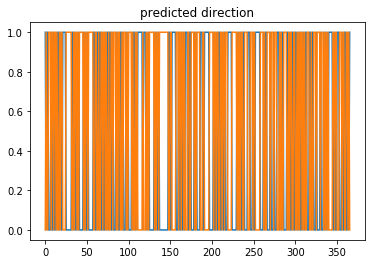

In [127]:
fig, ax = plt.subplots()
ax.plot(predicted_val)
plt.title('predicted direction')

Text(0.5, 1.0, 'Actual Direction ')

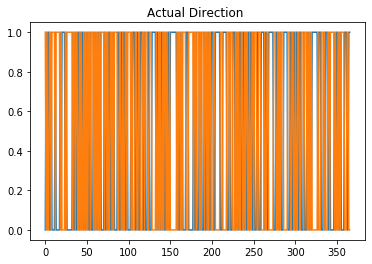

In [128]:
fig, ax = plt.subplots()
ax.plot(Y_test)
plt.title('Actual Direction ')

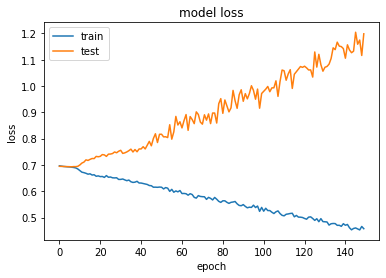

In [129]:
# plotting performance
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

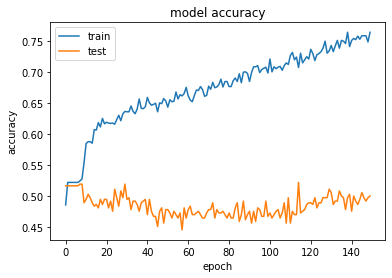

In [130]:
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [131]:
from sklearn.metrics import average_precision_score
precision = average_precision_score(Y_test, predictions, average ="micro")

print('Average precision-recall score: {0:0.2f}'.format(
      precision))

Average precision-recall score: 0.50


In [132]:
Y_test

array([[0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1,